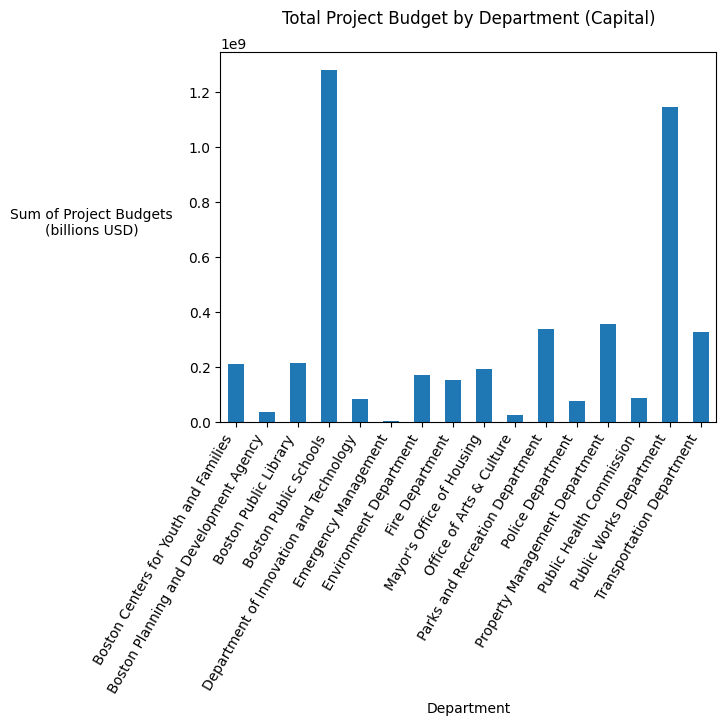

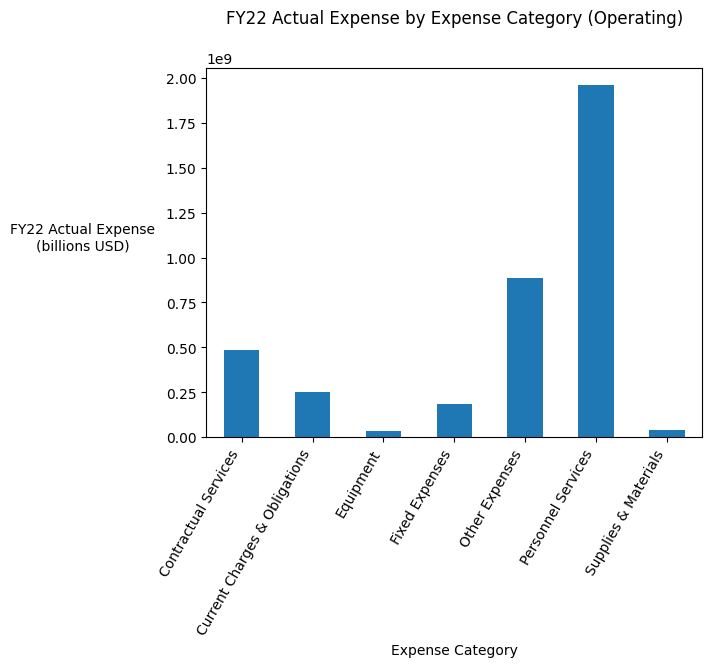

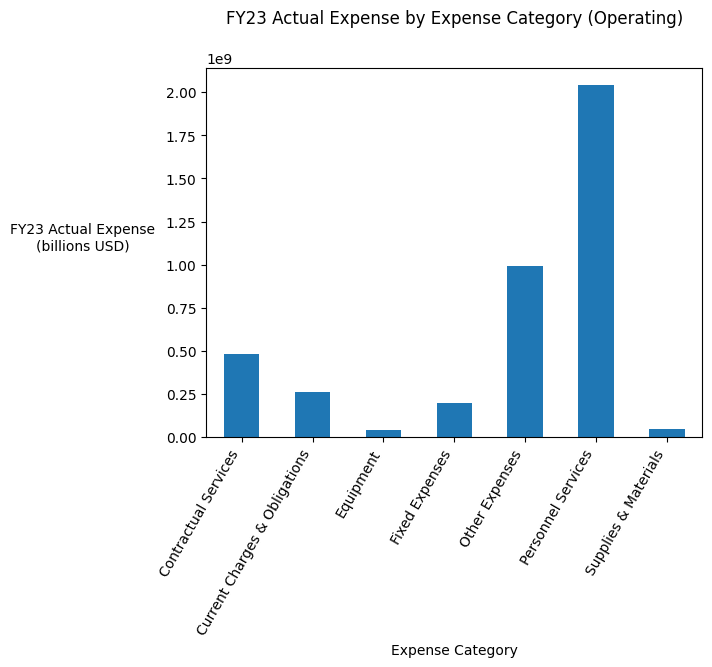

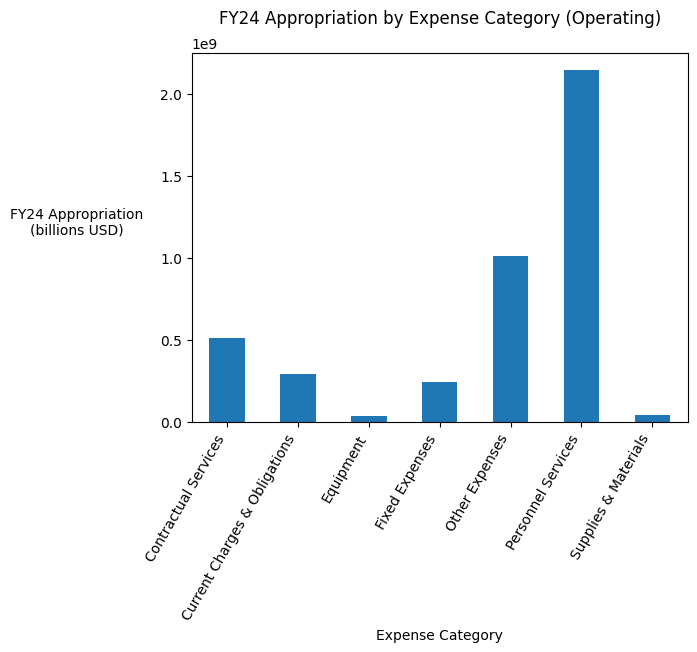

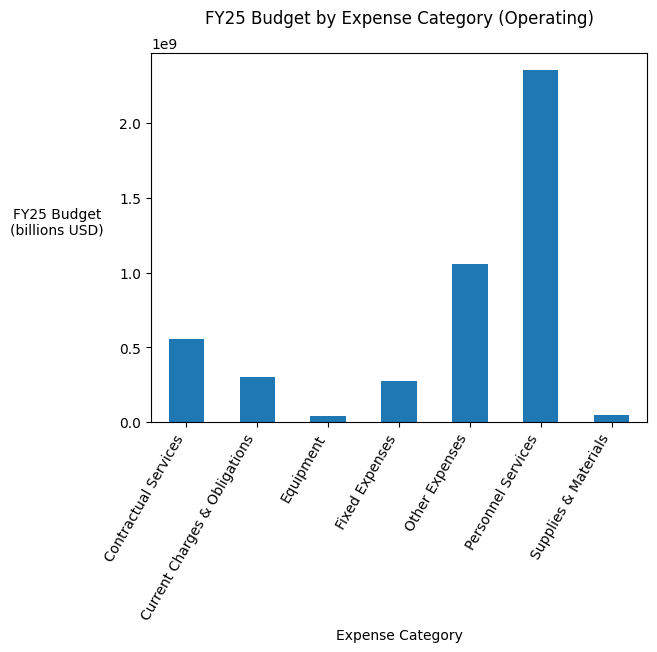

In [33]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd
import numpy as np

# Read the data from the CSV file
cap_budg = pd.read_csv('./data/capital_budget.csv')
op_budg = pd.read_csv('./data/operating_budget.csv')

# Clean the data
op_budg.replace("#Missing", 0, inplace=True)
op_budg['FY22 Actual Expense'] = pd.to_numeric(op_budg['FY22 Actual Expense'].str.replace(',', ''))
op_budg['FY23 Actual Expense'] = pd.to_numeric(op_budg['FY23 Actual Expense'].str.replace(',', ''))
op_budg['FY24 Appropriation'] = pd.to_numeric(op_budg['FY24 Appropriation'].str.replace(',', ''))
op_budg['FY25 Budget'] = pd.to_numeric(op_budg['FY25 Budget'].str.replace(',', ''))

# Plot the capital budget's total project budget for each department
cap_budg.groupby('Department')['Total_Project_Budget'].sum().plot(kind='bar')
plt.xticks(rotation=60, ha='right')
plt.ylabel('Sum of Project Budgets\n(billions USD)', rotation=0, labelpad=70)
plt.title('Total Project Budget by Department (Capital)\n')
plt.show()

op_budg.groupby('Expense Category')['FY22 Actual Expense'].sum().plot(kind='bar')
plt.xticks(rotation=60, ha='right')
plt.ylabel('FY22 Actual Expense\n(billions USD)', rotation=0, labelpad=60)
plt.title('FY22 Actual Expense by Expense Category (Operating)\n')
plt.show()

op_budg.groupby('Expense Category')['FY23 Actual Expense'].sum().plot(kind='bar')
plt.xticks(rotation=60, ha='right')
plt.ylabel('FY23 Actual Expense\n(billions USD)', rotation=0, labelpad=60)
plt.title('FY23 Actual Expense by Expense Category (Operating)\n')
plt.show()

op_budg.groupby('Expense Category')['FY24 Appropriation'].sum().plot(kind='bar')
plt.xticks(rotation=60, ha='right')
plt.ylabel('FY24 Appropriation\n(billions USD)', rotation=0, labelpad=60)
plt.title('FY24 Appropriation by Expense Category (Operating)\n')
plt.show()

op_budg.groupby('Expense Category')['FY25 Budget'].sum().plot(kind='bar')
plt.xticks(rotation=60, ha='right')
plt.ylabel('FY25 Budget\n(billions USD)', rotation=0, labelpad=45)
plt.title('FY25 Budget by Expense Category (Operating)\n')
plt.show()

In [3]:
op_budg.head()

,_id,Cabinet,Dept,Program,Expense Category,FY22 Actual Expense,FY23 Actual Expense,FY24 Appropriation,FY25 Budget
0,1,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Personnel Services,1624903.69,2374448.36,1921403.81,2217748.39
1,2,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Contractual Services,284597.90,383743.11,219633.42,234628.00
2,3,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Supplies & Materials,28541.55,74491.63,55573.65,60000.00
3,4,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Current Charges & Obligations,19410.30,25350.83,16734.29,20000.00
4,5,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Equipment,16164.36,44132.61,36115.00,53000.00


In [4]:
print(op_budg.isna().sum())
op_budg.info()

_id                      0
Cabinet                  0
Dept                     0
Program                  0
Expense Category         0
FY22 Actual Expense    183
FY23 Actual Expense    138
FY24 Appropriation     129
FY25 Budget             94
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _id                  943 non-null    int64  
 1   Cabinet              943 non-null    object 
 2   Dept                 943 non-null    object 
 3   Program              943 non-null    object 
 4   Expense Category     943 non-null    object 
 5   FY22 Actual Expense  760 non-null    float64
 6   FY23 Actual Expense  805 non-null    float64
 7   FY24 Appropriation   814 non-null    float64
 8   FY25 Budget          849 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 66.4+ KB


In [ ]:
# Unique values for Cabinet, Dept, Program, Expense Category
print('Cabinet Unique Values:')
print(op_budg['Cabinet'].unique())
print('\nDept Unique Values:')
print(op_budg['Dept'].unique())
print('\nProgram Unique Values:')
print(op_budg['Program'].unique())
print('\nExpense Category Unique Values:')
print(op_budg['Expense Category'].unique())

Cabinet Unique Values:
["Mayor's Cabinet" 'Equity & Inclusion Cabinet' 'OPAT Cabinet'
 'Operations Cabinet' 'Community Engagement Cabinet'
 'Arts & Culture Cabinet' 'Economic Opportunity & Inclusion Cabinet'
 'Worker Empowerment Cabinet' 'Education Cabinet'
 'Environment, Energy & Open Space Cabinet' 'Finance Cabinet'
 'People Operations Cabinet' 'Human Services Cabinet'
 'Public Health Cabinet' 'Housing Cabinet'
 'Information & Technology Cabinet' 'Public Safety Cabinet'
 'Streets Cabinet' 'Planning Cabinet' 'Non-Mayoral Departments' 'Other']

Dept Unique Values:
["Mayor's Office" 'Election Division' 'Listing Board'
 'Intergovernmental Relations' 'Law Department' 'Office of Equity'
 'Office of Diversity' 'Office of Resiliency & Racial Equity'
 'Office of Language & Communications Access' 'Human Right Commission'
 'Office for Immigrant Advancement' "Women's Advancement"
 'Black Male Advancement' 'Fair Housing & Equity' 'LGBTQ+ Advancement'
 'Commission For Persons W/Disabilities'
 'Off

In [19]:
pd.options.display.float_format = '{:,.2f}'.format

In [20]:
# Summing expenses by department for each fiscal year
dept_spending = op_budg.groupby('Dept')[['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation', 'FY25 Budget']].sum()
dept_spending = dept_spending.sort_values('FY25 Budget', ascending=False)

print(dept_spending)

                                      FY22 Actual Expense  \
Dept                                                        
Boston Public Schools                    1,294,706,181.37   
Police Department                          420,411,576.37   
Pensions                                   323,684,235.00   
Fire Department                            289,513,751.64   
Charter School Tuition                     229,842,219.00   
...                                                   ...   
Human Right Commission                         370,250.34   
Reserve                                      2,250,273.73   
Unemployment Compensation                      190,161.56   
Office of Diversity                            254,220.28   
Office of Resiliency & Racial Equity         1,740,456.28   

                                      FY23 Actual Expense  FY24 Appropriation  \
Dept                                                                            
Boston Public Schools                    1,3

C:\Users\rehan\AppData\Local\Temp\ipykernel_9988\1536599812.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_n.loc['Other'] = other  # Add an 'Other' category


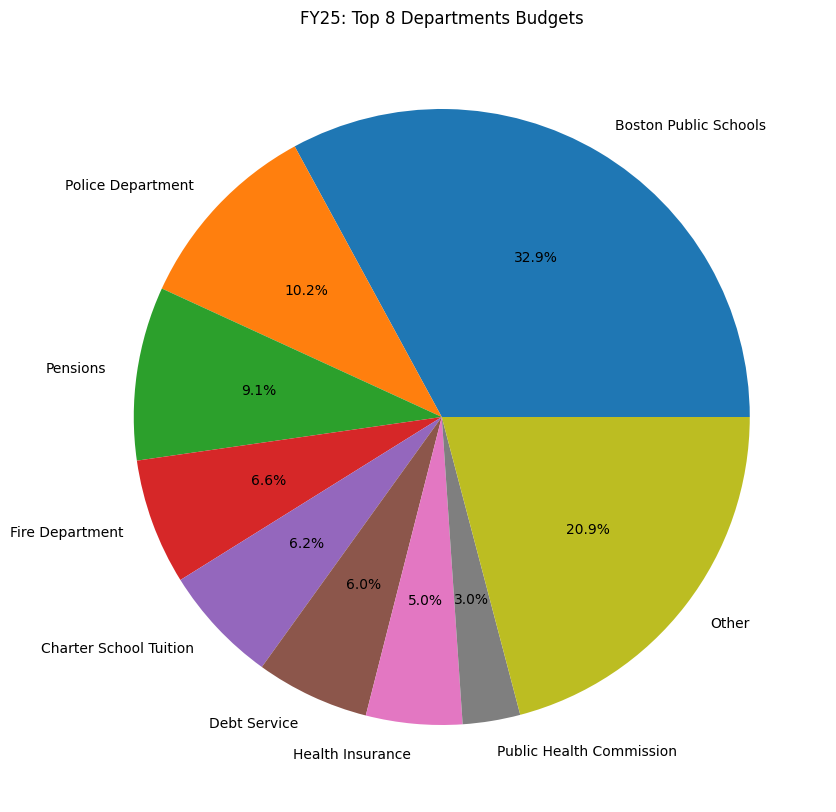

In [ ]:
n = 10  # Number of top departments to display
top_n = dept_spending.head(n)  # Get the top 10 departments
other = dept_spending.iloc[n:].sum()  # Sum the remaining departments
top_n.loc['Other'] = other  # Add an 'Other' category

# Plot the pie chart
plt.figure(figsize=(10, 10))
top_n['FY25 Budget'].plot.pie(
    autopct='%1.1f%%', 
    legend=False, 
    wedgeprops={'edgecolor': 'black'}
)
plt.axis('off')
plt.title(f'FY25: Top {n} Departments Budgets')
plt.show()

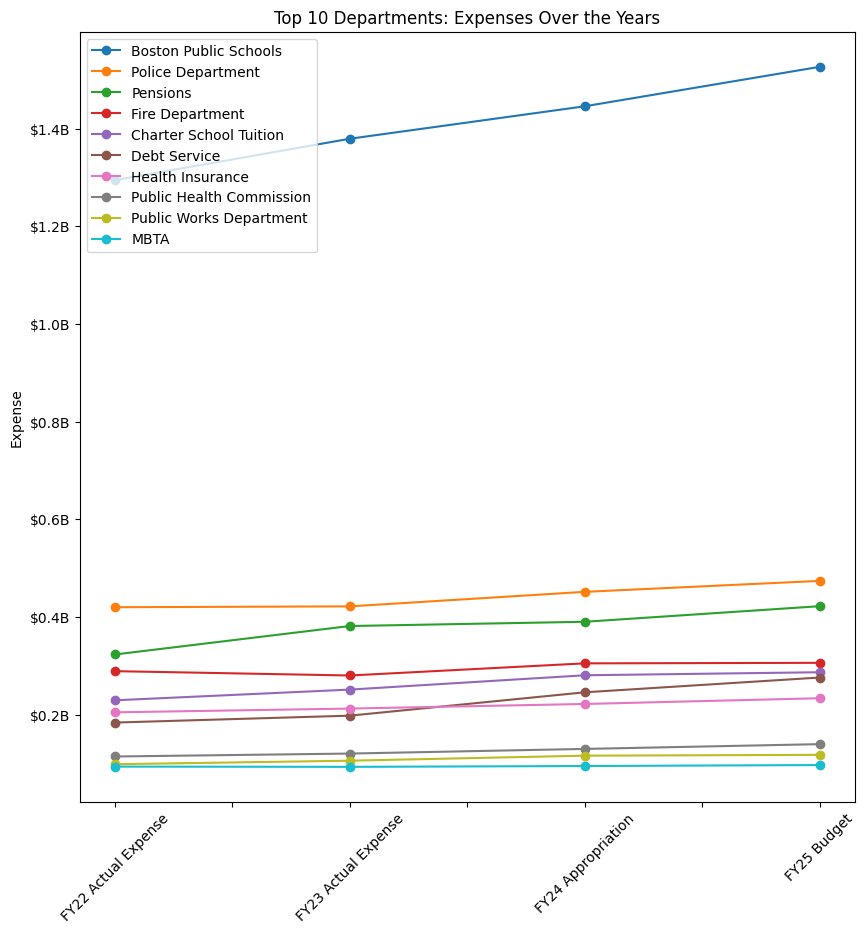

In [34]:
def billions(x, pos):
    return f'${x * 1e-9:.1f}B'  # Format as billions with a "B" suffix

# Define the number of top departments
n = 10
top_n_depts = dept_spending.head(n).index  # Get the top n department names

# Plot expenses over the years for the top n departments
plt.figure(figsize=(10, 10))
for dept in top_n_depts:
    # Filter data for the current department and sum the yearly columns
    dept_data = op_budg[op_budg['Dept'] == dept][['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation', 'FY25 Budget']].sum()
    
    # Plot the line for this department
    dept_data.plot(marker='o', label=dept)

# Apply the custom y-axis formatting
plt.gca().yaxis.set_major_formatter(FuncFormatter(billions))

# Add labels and title
plt.xticks(rotation=45)
plt.ylabel('Expense')
plt.title(f'Top {n} Departments: Expenses Over the Years')
plt.legend(loc='upper left')
plt.show()

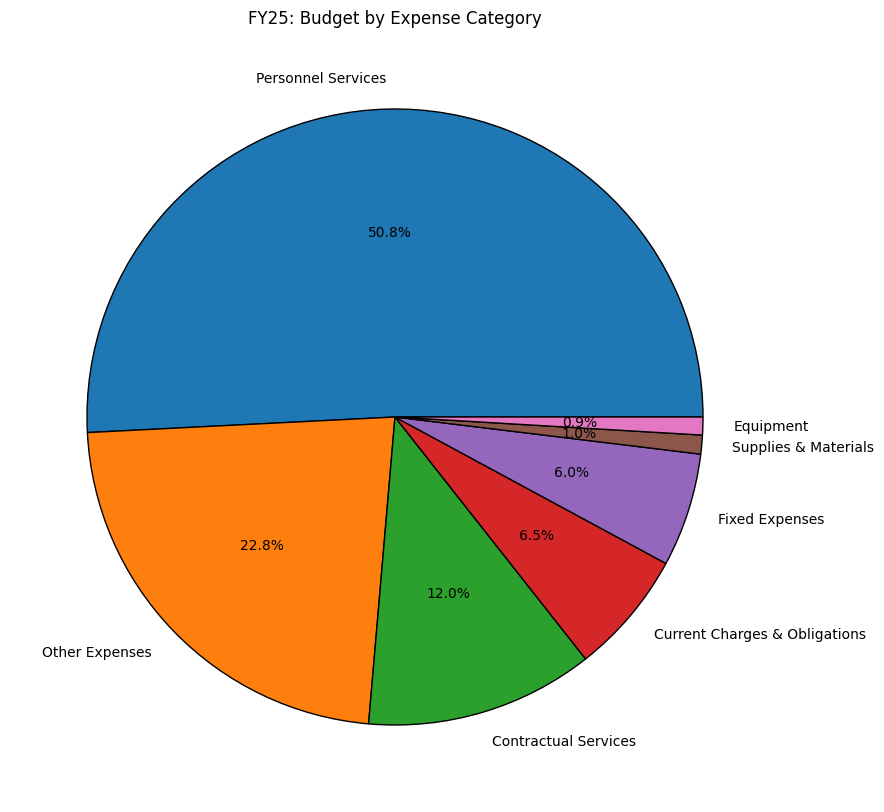

In [44]:
# Summing FY25 Budget by Expense Category
category_spending = op_budg.groupby('Expense Category')['FY25 Budget'].sum()
category_spending = category_spending.sort_values(ascending=False)

# Plot the pie chart
plt.figure(figsize=(10, 10))
category_spending.plot.pie(
    autopct='%1.1f%%', 
    legend=False, 
    wedgeprops={'edgecolor': 'black'}
)
plt.axis('off')
plt.title('FY25: Budget by Expense Category')
plt.show()

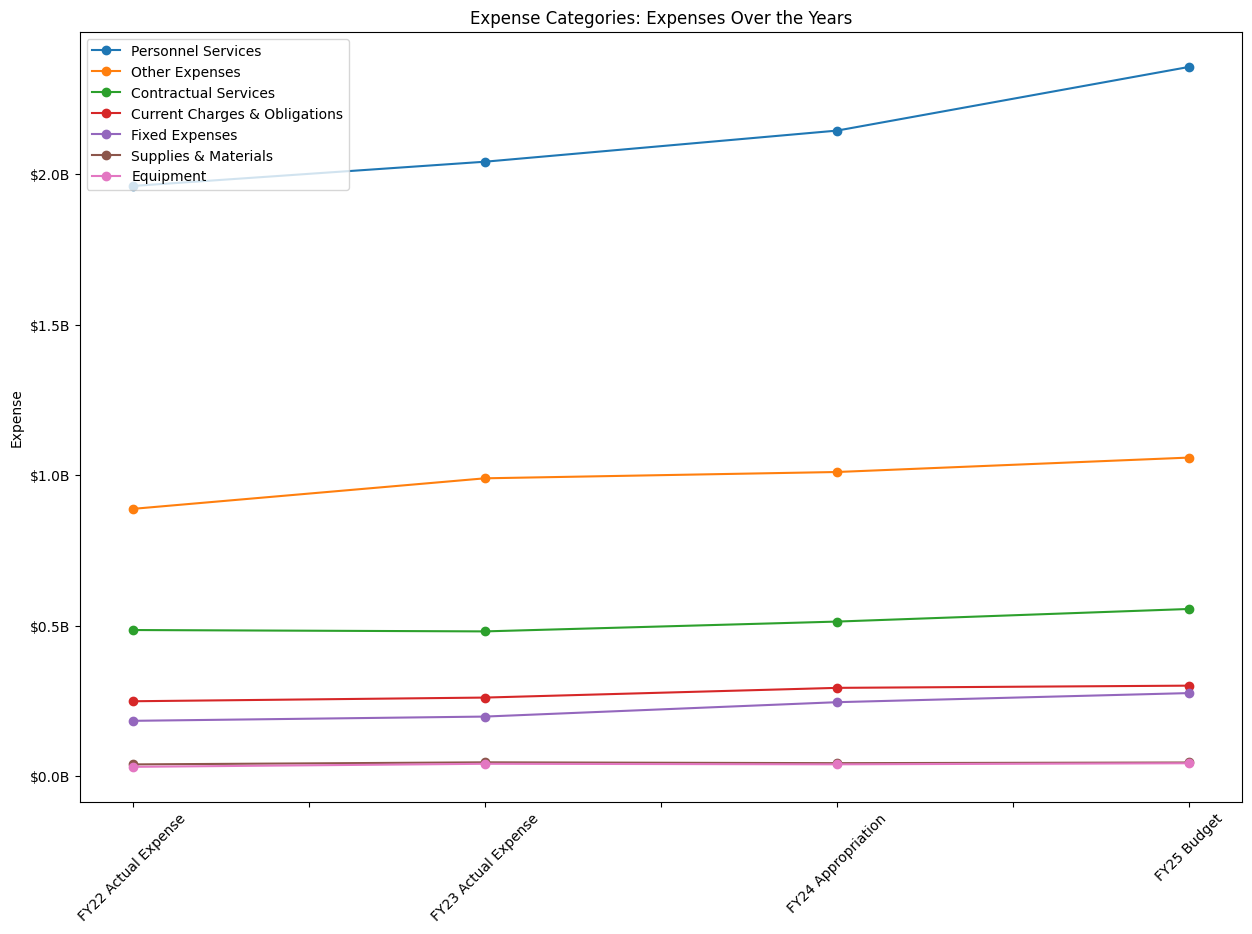

In [36]:
def billions(x, pos):
    return f'${x * 1e-9:.1f}B'  # Format as billions with a "B" suffix

# Plot expenses over the years for each category
plt.figure(figsize=(15, 10))
for category in category_spending.index:
    category_data = op_budg[op_budg['Expense Category'] == category][['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation', 'FY25 Budget']].sum()
    category_data.plot(marker='o', label=category)

# Apply the custom y-axis formatting
plt.gca().yaxis.set_major_formatter(FuncFormatter(billions))

# Add labels, title, and legend
plt.xticks(rotation=45)
plt.ylabel('Expense')
plt.title('Expense Categories: Expenses Over the Years')
plt.legend(loc='upper left')
plt.show()

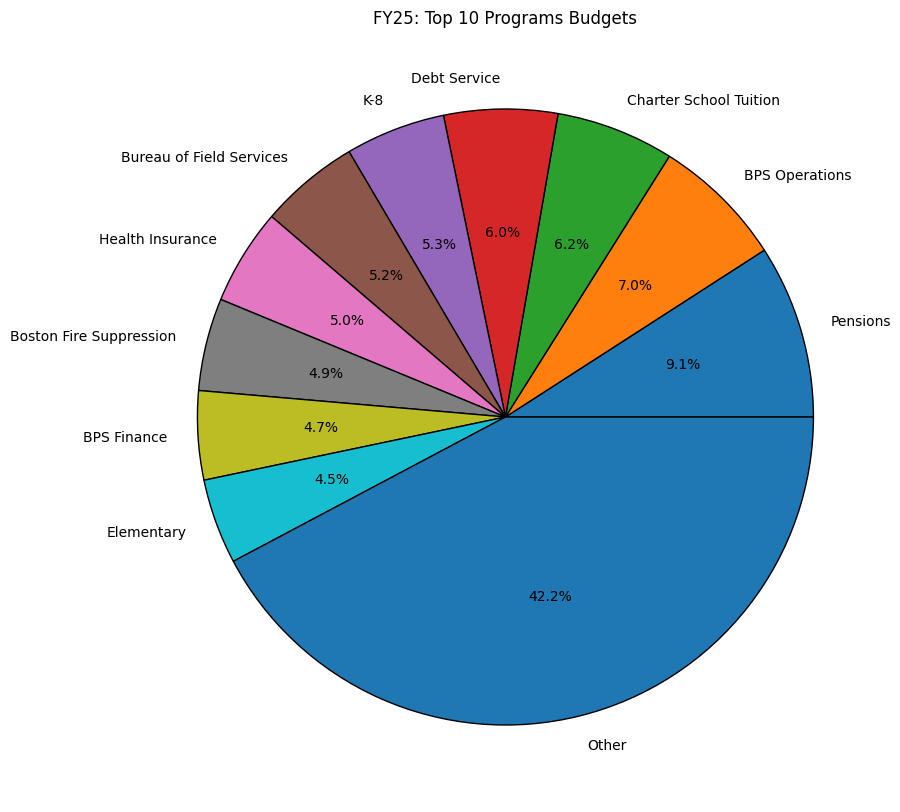

In [43]:
n_program = 10
program_spending = op_budg.groupby('Program')['FY25 Budget'].sum()
program_spending = program_spending.sort_values(ascending=False)

# Select the top 10 programs and sum the rest as "Other"
top_n_program = program_spending.head(n_program)
other = program_spending.iloc[n_program:].sum()
top_n_program.loc['Other'] = other

# Plot the pie chart
plt.figure(figsize=(10, 10))
top_n_program.plot.pie(
    autopct='%1.1f%%', 
    legend=False, 
    wedgeprops={'edgecolor': 'black'}
)
plt.axis('off')
plt.title(f'FY25: Top {n_program} Programs Budgets')
plt.show()